# 如何创建子图

Matplotlib有一个概念subplot：包含在Figure对象中的小型Axes对象。这允许我们在一幅图中创建很多个子图，方便对比数据。

创建子图的3种常用方法：

1. fig.add_axes
2. plt.subplots
3. plt.GridSpec

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("ggplot")

## 1. fig.add_axes

1. 先调用plt.figure()创建Figure对象，图表是所有坐标的容器。
2. 调用fig.add_axes()在图表的任意位置添加子图，该方法接收一个包含4个数字的列表: $[x, y, width, height]$，分别代表子图左下角的坐标(x,y)，子图的宽度和高度，这四个数字的取值范围都是$[0,1]$，代表相对位置和大小。
3. 最后调用ax.plot将数据映射到子图。

<BarContainer object of 6 artists>

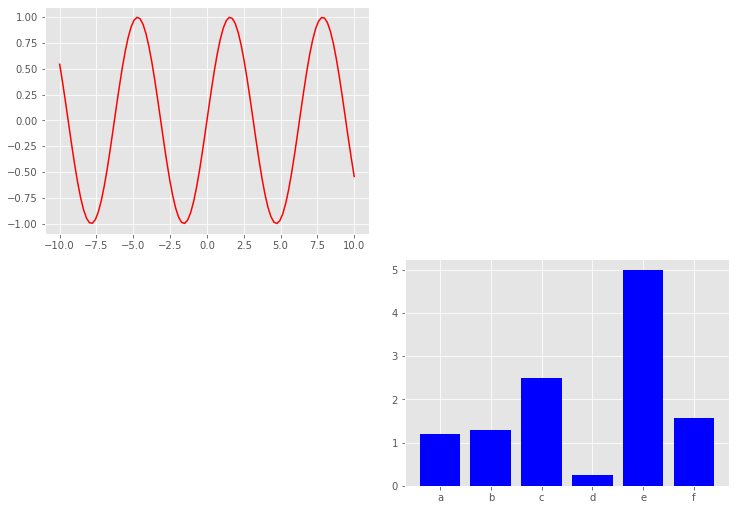

In [2]:
# 创建图表对象
fig = plt.figure(figsize=(10, 7))

# 创建子图
ax1 = fig.add_axes([0, 0.5, 0.45, 0.45])  # 在图表的左上角创建一个子图
ax2 = fig.add_axes([0.5, 0, 0.45, 0.45])  # 在图表的右下方创建一个子图

# 左上角子图：曲线图
x1 = np.linspace(-10, 10, 100)
ax1.plot(x1, np.sin(x1), color="red")

# 右下角子图：柱状图
x2 = ["a", "b", "c", "d", "e", "f"]
y2 = [1.2, 1.3, 2.5, 0.25, 5, 1.56]
ax2.bar(x2, y2, color="blue")

## 2. plt.subplots

plt.subplots用于快速创建多个子图，这些子图会以网格状排列。函数返回长度为2的元组，第一个元素是Figure对象，第二个元素是坐标集合。

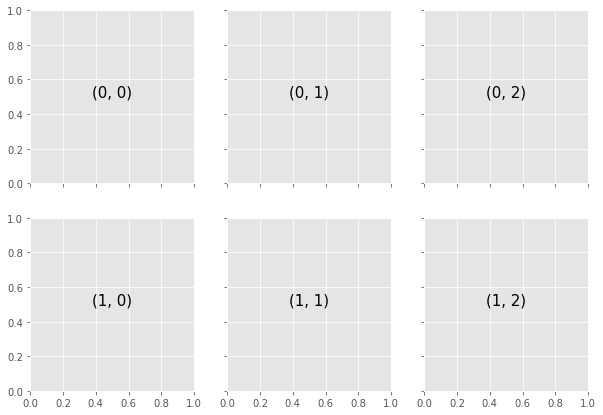

In [4]:
# 创建一个图形对象，拆分为2*3的网格，包含6个坐标对象
fig, axes = plt.subplots(
    nrows=2,  # 定义行数
    ncols=3,  # 定义列数
    sharex=True,  # 是否共享x轴坐标
    sharey=True,  # 是否共享y轴坐标
    figsize=(10, 7)  # 图像大小
)

# axes是2*3的numpy数组，可根据[row, col]索引获取单个坐标对象
# print(type(axes))
# print(axes)

for i in range(2):
    for j in range(3):
        axes[i, j].text(0.5, 0.5, str((i, j)), ha="center", fontsize=15)

## 3. plt.GridSpec

上面的案例创建了规则排列的子图(网格状)，但有时候想创建不规则的子图，部分子图更大，展示核心信息，有的子图较小，展现辅助信息。

plt.GridSpec可实现这一点，工作原理是先创建一个网格状的蓝图，然后合并部分子图（类似于Excel中合并单元格的操作）。

1. 调用plt.GridSpec创建网格状的蓝图
2. 通过切片和索引按需求'合并'子图
3. 调用ax.plot()将数据映射到图表

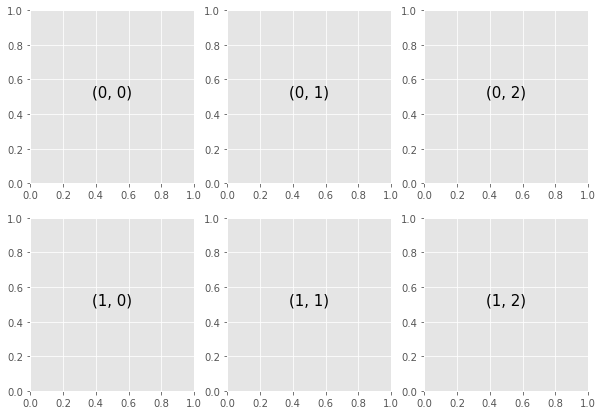

In [5]:
# 创建图表对象
fig = plt.figure(figsize=(10, 7))

# 创建2*3的'网格'蓝图
grid = plt.GridSpec(nrows=2, ncols=3, figure=fig)

# 网格对象可索引和切片，根据网格对象可创建坐标对象
for row in range(2):
    for col in range(3):
        ax = plt.subplot(grid[row, col])
        ax.text(0.5, 0.5, str((row, col)), ha="center", fontsize=15)

# 至此的效果跟plt.subplots相同，接下来我们展示如何合并子图

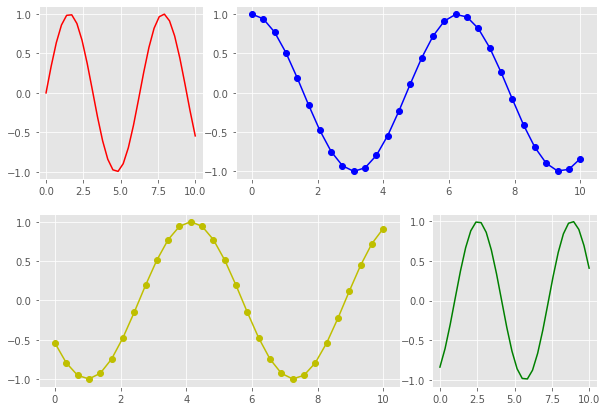

In [6]:
# 创建图表对象
fig = plt.figure(figsize=(10, 7))

# 创建2*3的'网格'蓝图
grid = plt.GridSpec(nrows=2, ncols=3, figure=fig)

# 合并子图
ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1:])  # 合并(0,1)和(0,2)位置的子图
ax3 = plt.subplot(grid[1, 0:2])  # 合并(1,0)和(1,1)位置的子图
ax4 = plt.subplot(grid[1, 2])

x = np.linspace(0, 10, 30)

ax1.plot(x, np.sin(x), "-r")
ax2.plot(x, np.cos(x), "-ob")
ax3.plot(x, np.sin(x + 10), "-oy")
ax4.plot(x, np.cos(x + 10), "-g")